# 2020.11.25
# 인공지능 강의 13일차

===============================================================

불확실성의 표현과 처리.hwp

나와 있는 페이지에 들어가서 읽어보기!

Boston_DTR 복습하기!

Boston_FS 복습하기!

===============================================================

타이타닉 숙제

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
dataset = pd.read_csv('titanic_train.csv')

In [144]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [145]:
data = dataset.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [146]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [147]:
data = data.dropna()
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [148]:
def get_category(age):
    if age <= -1: return 0
    elif age <= 5: return 1
    elif age <= 12: return 2
    elif age <= 18: return 3
    elif age <= 25: return 4
    elif age <= 35: return 5
    elif age <= 60: return 6
    else: return 7

def get_category1(fare):
    if fare <= -1: return 0
    elif fare <= 8: return 1
    elif fare <= 16: return 2
    elif fare <= 33: return 3
    else: return 4

data['Age'] = data['Age'].apply(lambda x: get_category(x)).astype(int)
data['Fare'] = data['Fare'].apply(lambda x: get_category1(x))
data['Sex'] = data['Sex'].map({'male': 0, 'female':1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Family'] = data['SibSp']+data['Parch']+1
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,4,1,0,1,0,2
1,1,1,1,6,1,0,4,1,2
2,1,3,1,5,0,0,1,0,1


In [149]:
y = data['Survived']
x = data.drop('Survived', axis=1)

<AxesSubplot:>

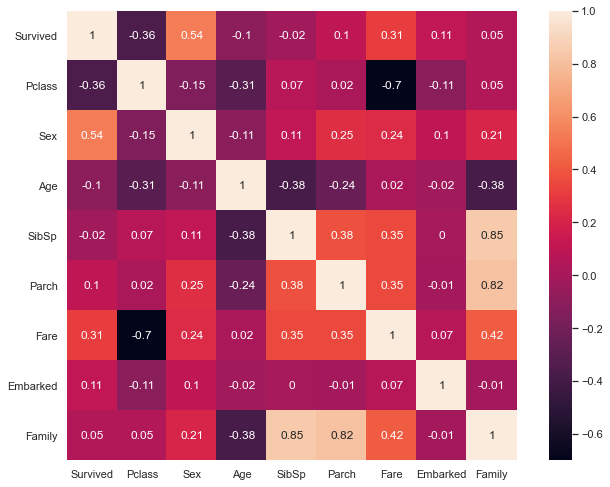

In [150]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.corr().round(2), square=True, annot=True)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [152]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pre1 = lr.predict(x_test)

In [153]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10, random_state=10)
dt.fit(x_train, y_train)
pre2 = dt.predict(x_test)

In [154]:
from sklearn.metrics import r2_score

print(r2_score(y_test, pre1))
print(r2_score(y_test, pre2))

0.4403445136714781
0.2549328947728372


[Text(1860.0, 3171.0, 'Sex <= 0.5\nmse = 0.241\nsamples = 712\nvalue = 0.404'),
 Text(930.0, 2265.0, 'Age <= 2.5\nmse = 0.163\nsamples = 453\nvalue = 0.205'),
 Text(465.0, 1359.0, 'SibSp <= 2.5\nmse = 0.245\nsamples = 37\nvalue = 0.568'),
 Text(232.5, 453.0, 'mse = 0.045\nsamples = 21\nvalue = 0.952'),
 Text(697.5, 453.0, 'mse = 0.059\nsamples = 16\nvalue = 0.062'),
 Text(1395.0, 1359.0, 'Pclass <= 1.5\nmse = 0.143\nsamples = 416\nvalue = 0.173'),
 Text(1162.5, 453.0, 'mse = 0.235\nsamples = 98\nvalue = 0.378'),
 Text(1627.5, 453.0, 'mse = 0.098\nsamples = 318\nvalue = 0.11'),
 Text(2790.0, 2265.0, 'Pclass <= 2.5\nmse = 0.186\nsamples = 259\nvalue = 0.753'),
 Text(2325.0, 1359.0, 'Fare <= 3.5\nmse = 0.054\nsamples = 157\nvalue = 0.943'),
 Text(2092.5, 453.0, 'mse = 0.084\nsamples = 76\nvalue = 0.908'),
 Text(2557.5, 453.0, 'mse = 0.024\nsamples = 81\nvalue = 0.975'),
 Text(3255.0, 1359.0, 'Family <= 4.5\nmse = 0.248\nsamples = 102\nvalue = 0.461'),
 Text(3022.5, 453.0, 'mse = 0.248\nsa

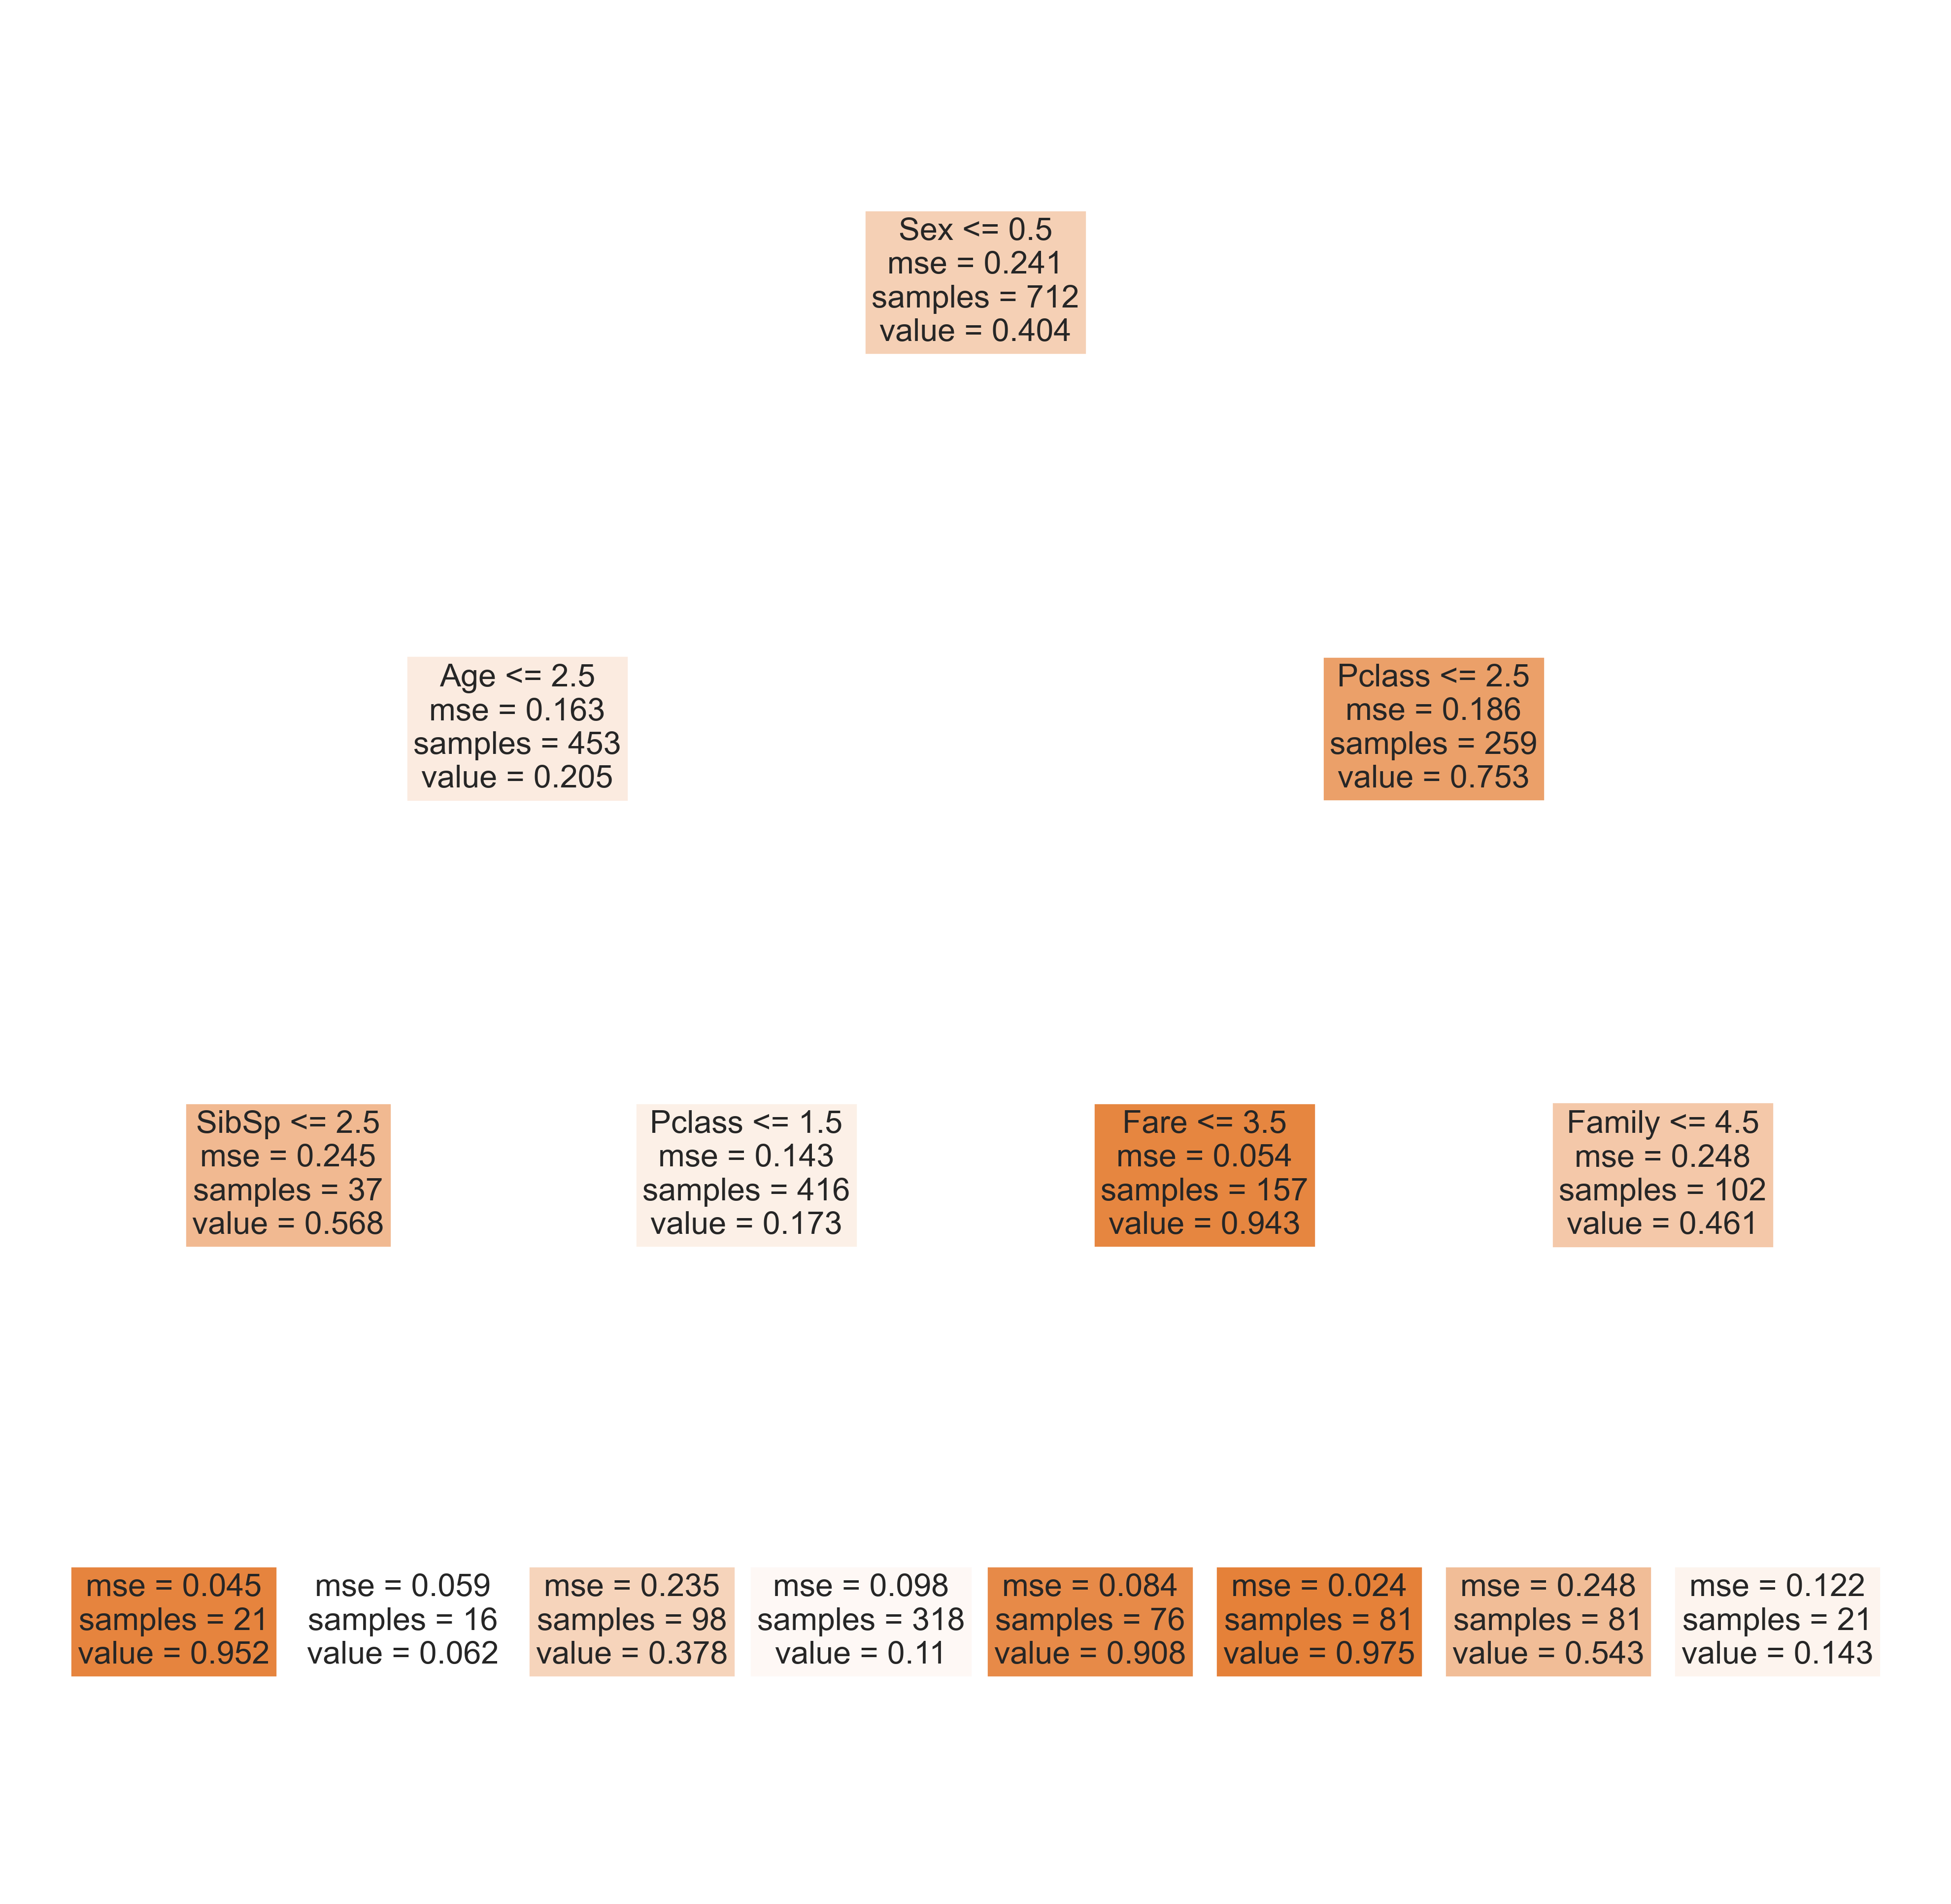

In [157]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=3, random_state=10)

clf.fit(x, y)

fn = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Emabarked', 'Family']
cn = ['Survived']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=1200)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled = True)

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

Feature 0: 66.946678
Feature 1: 228.447626
Feature 2: 5.457738
Feature 3: 0.669467
Feature 4: 3.362896
Feature 5: 44.486677
Feature 6: 6.878799
Feature 7: 0.234601


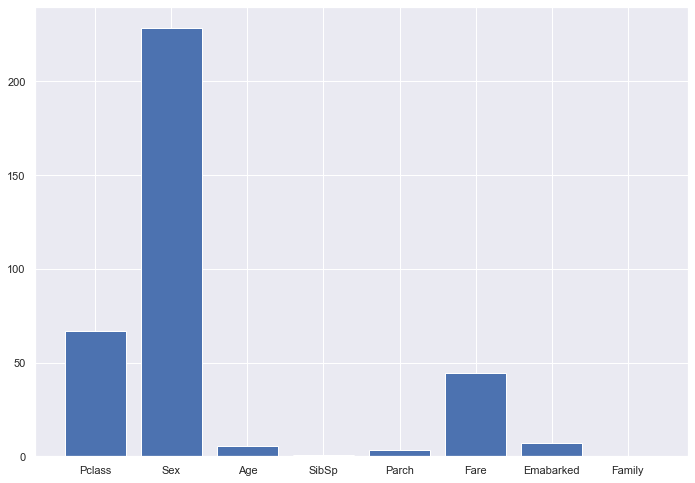

In [163]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(range(len(fn)), fn)
pyplot.show()

========================================================================

Boston_RFE 복습하기!

책 보면서 복습하기!

========================================================================